# Wheat and Chess Board Problem
If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains. of wheat would be on the chessboard at the finish?

The problem is to find the final number of wheat grains on an 8x8 chessboard by placing them in the order 1, 2, 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list).reshape(2, 2)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]
Arrange wheat on a plate of 4 squares (ndarray)：[[1 2]
 [4 8]]


### Modify shape to chess board

In [3]:
def shape_modify(array, n, m):
    return array.reshape(n, m)

### Total number of wheat

In [4]:
def find_wheat_lst(size):
    wheat_amount = 1
    lst = [1]
    for i in range(1, size):
        wheat_amount *= 2
        lst.append(wheat_amount)
    return np.array(lst)

wheat_array = shape_modify(find_wheat_lst(8*8), 8, 8)

In [26]:
def total_wheat(array):
    return np.sum(wheat_array)

def average_column(array):
    return array.mean(axis=0)

print('Total wheat on the 8x8 Chess board: {}'.format(total_wheat(wheat_array)))
print('Total wheat on each column of the 8x8 Chess board: {}'.format(average_column(wheat_array)))

Total wheat on the 8x8 Chess board: 1.8446744073709552e+19
Total wheat on each column of the 8x8 Chess board: [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


### Visualization using Bar chart

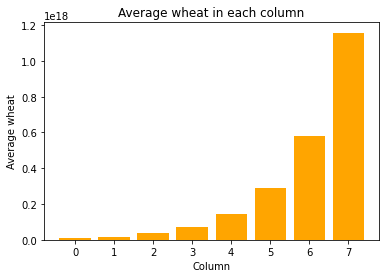

In [6]:
%matplotlib inline
plt.xlabel("Column")
plt.ylabel("Average wheat")
plt.title("Average wheat in each column")
plt.bar(np.arange(8), average_column(wheat_array), color='orange')
plt.show()

### Heat map of the number of wheat

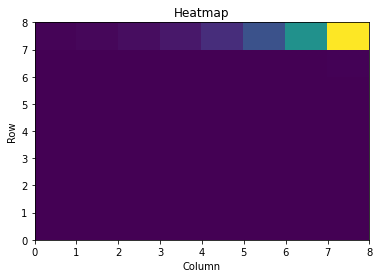

In [7]:
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap")
plt.pcolor(wheat_array)
plt.show()

### How many times is the second half as long as the first half?

In [8]:
first_half_sum = np.sum(wheat_array[:, 0:3])
second_half_sum = np.sum(wheat_array[:, 4:8])

print('The number of wheat in the second half is greater than first half {} time'.format(second_half_sum/first_half_sum))

The number of wheat in the second half is greater than first half 34.285714285714285 time


# Other calculation method

In [14]:
n_squares = 64
small_board_ndarray = np.array([1]).astype(np.uint64)
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("Arrange wheat on a plate of 64 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 64 squares (ndarray)：[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.611

In [27]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
small_board_ndarray = 2**indices_of_squares
print("Arrange wheat on a plate of 64 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 64 squares (ndarray)：[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      7036874417